In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
input_label = []
output_label = []

In [3]:
ficheiro = open("E:\\Lazer\\Python\\Trabalhos\\Keras\\MiniIDS\\dados.csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    out = linha.pop(18)
    if(out == "Benign"): out = 0
    else: out = 1
    output_label.append(out)
    input_label.append(np.array([float(i) for i in linha]))
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

print(countLinha)

136472


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
input_label = scaler.fit_transform(input_label)

In [5]:
input_label = np.array(input_label)
output_label = np.array(output_label)

In [6]:
input_label, output_label = shuffle(input_label, output_label)

In [7]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.01)

In [53]:
model = keras.Sequential([
    layers.Dense(units = 78, input_shape = (78, ), activation = "relu", use_bias = True),
    layers.Dense(units = 128, activation = "relu", use_bias = True),
    layers.Dense(units = 64, activation = "relu", use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [54]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate= 0.3), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [56]:
treino1 = model.fit(x = inp_train, y = out_train, validation_split= 0.1, epochs = 50, shuffle = True,verbose = 2)

Epoch 1/50
3800/3800 - 5s - loss: 0.6910 - accuracy: 0.5077 - val_loss: 0.6996 - val_accuracy: 0.4995
Epoch 2/50
3800/3800 - 5s - loss: 0.6906 - accuracy: 0.5117 - val_loss: 0.7014 - val_accuracy: 0.4999
Epoch 3/50
3800/3800 - 5s - loss: 0.6908 - accuracy: 0.5098 - val_loss: 0.6997 - val_accuracy: 0.5034
Epoch 4/50
3800/3800 - 6s - loss: 0.6906 - accuracy: 0.5115 - val_loss: 0.6984 - val_accuracy: 0.4983
Epoch 5/50
3800/3800 - 5s - loss: 0.6904 - accuracy: 0.5115 - val_loss: 0.7015 - val_accuracy: 0.4997
Epoch 6/50
3800/3800 - 5s - loss: 0.6904 - accuracy: 0.5112 - val_loss: 0.7011 - val_accuracy: 0.5026
Epoch 7/50
3800/3800 - 5s - loss: 0.6903 - accuracy: 0.5114 - val_loss: 0.6991 - val_accuracy: 0.5001
Epoch 8/50
3800/3800 - 5s - loss: 0.6902 - accuracy: 0.5111 - val_loss: 0.7029 - val_accuracy: 0.5022
Epoch 9/50
3800/3800 - 5s - loss: 0.6900 - accuracy: 0.5112 - val_loss: 0.7014 - val_accuracy: 0.4991
Epoch 10/50
3800/3800 - 5s - loss: 0.6898 - accuracy: 0.5114 - val_loss: 0.7022 - 

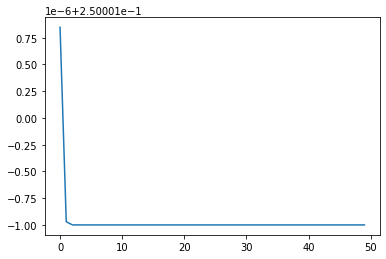

In [38]:
plt.plot(treino1.history["val_loss"])
plt.show()